# Stock Trading test

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from elegantrl.train.run_tutorial import *
from elegantrl.train.run_parallel import *
from elegantrl.train.config import Arguments
from elegantrl.agents import AgentPPO, AgentDDPG
from stock_env_multiple import StockEnvMultiple

np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

In [2]:
tics = pd.read_csv('data/filtered_with_ti.csv', header=0)
all_tickers = tics['tic'].unique()
daterange = tics[tics['tic'] == 'AAPL']['Date'].to_numpy()

def check_tickers(stock):
    return stock in all_tickers

def check_date(date):
    return date in daterange

In [3]:
check_date('2006-06-16')

True

In [4]:
check_tickers('TSLA')

True

In [5]:
tics['Close']

0           20.01
1           20.10
2           20.12
3           20.34
4           20.46
            ...  
1876119    129.10
1876120    128.36
1876121    128.92
1876122    132.36
1876123    134.10
Name: Close, Length: 1876124, dtype: float64

In [6]:
# Arguments
tics[tics['Close'] > 1e4]

,gvkey,iid,Date,tic,Volume,Close,High,Low,Open,rsi,macd,macdsignal,macdhist,obv,cci,adx


In [7]:
used_tickers = ['PNW', 'BBY', 'BIO', 'RHI', 'CI', 'CSX', 'KO', 'CCZ', 'CMA', 'ETN',
               'XOM', 'FDX', 'FRT', 'MTB', 'AJG', 'HGM', 'ITW', 'IFF', 'KSU', 'CVS',
               'NEM', 'XEL', 'OKE', 'PNC', 'PEP', 'MO', 'RGE', 'SO', 'SYK', 'TER',
               'TSN', 'AEE', 'WST', 'WDC', 'JKHY', 'TFC', 'MS', 'TROW', 'UNN', 'CDNS']

for tic in used_tickers:
    print(tic, check_tickers(tic))

# used_tickers = ['MSFT', 'AAPL', 'TSLA']


tickers = {x: 0 for x in used_tickers}
initial_stocks = np.zeros([len(tickers), 1])


gamma = 0.99
max_stock = 1e2
initial_capital = 1e6
initial_stocks = np.zeros(len(tickers), dtype=np.float32)

start_date = '2006-01-03'
end_date = '2015-06-16'
start_eval_date = '2016-01-01'
end_eval_date = '2021-01-01'

# Agent
ppo = AgentPPO.AgentPPO() # AgentSAC(), AgentTD3(), AgentDDPG()?
ppo.if_use_gae = True
ppo.lambda_entropy = 0.1
ppo.if_on_policy = True

# Environment
env = StockEnvMultiple(tickers=tickers, begin_date=start_date, end_date=end_date)
env.max_step = 100

args = Arguments(env, ppo)


# Hyperparameters
args.gamma = gamma
# args.cwd = './models/RLStockPPO_v3/'
args.break_step = int(2e5)
args.net_dim = 2 ** 9
args.max_step = args.env.max_step
args.max_memo = args.max_step * 4
args.reward_scale = 1e-4
args.batch_size = 2 ** 10
args.repeat_times = 1
args.eval_gap = 2 ** 4
args.eval_times1 = 2 ** 3
args.eval_times2 = 2 ** 5
args.worker_num = 4
args.thread_num = 16
args.if_allow_break = False
args.target_return = 1.1e7
args.rollout_num = 4 # the number of rollout workers (larger is not always faster)

PNW True
BBY True
BIO True
RHI True
CI True
CSX True
KO True
CCZ True
CMA True
ETN True
XOM True
FDX True
FRT True
MTB True
AJG True
HGM True
ITW True
IFF True
KSU True
CVS True
NEM True
XEL True
OKE True
PNC True
PEP True
MO True
RGE True
SO True
SYK True
TER True
TSN True
AEE True
WST True
WDC True
JKHY True
TFC True
MS True
TROW True
UNN True
CDNS True
Using stocks: ['PNW', 'BBY', 'BIO', 'RHI', 'CI', 'CSX', 'KO', 'CCZ', 'CMA', 'ETN', 'XOM', 'FDX', 'FRT', 'MTB', 'AJG', 'HGM', 'ITW', 'IFF', 'KSU', 'CVS', 'NEM', 'XEL', 'OKE', 'PNC', 'PEP', 'MO', 'RGE', 'SO', 'SYK', 'TER', 'TSN', 'AEE', 'WST', 'WDC', 'JKHY', 'TFC', 'MS', 'TROW', 'UNN', 'CDNS']


In [8]:
env.reset()
count = 0
out = False
while not out:
    state, _, out, _ = env.step(np.array([0.1] * 100))
    test = state.sum()
    if np.isnan(test):
        break
    count += 1
env.state
count

2378

In [9]:
env.state

array([1000000.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
       0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
       0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00,
       0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 41.60, 43.75,
       64.70, 37.79, 111.89, 50.92, 40.79, 40.25, 56.86, 67.30, 56.42,
       103.38, 60.65, 109.05, 30.98, 14.25, 88.60, 33.69, 24.67, 26.67,
       54.10, 18.52, 26.87, 62.25, 59.92, 75.15, 26.01, 34.76, 44.90,
       14.50, 17.07, 51.70, 25.15, 18.64, 19.10, 42.13, 57.17, 72.37,
       24.64, 16.89, 42.45, 44.73, 65.45, 37.48, 112.30, 49.95, 40.90,
       41.00, 57.60, 67.23, 58.47, 103.32, 61.63, 110.99, 31.34, 14.14,
       89.58, 33.75, 24.44, 26.35, 57.14, 18.57, 27.32, 63.56, 59.76,
       74.98, 26.45, 35.07, 44.60, 14.78, 16.71, 51.86, 25.86, 19.02,
       19.35, 42.31, 58.31, 72.99, 24.74, 16.95, 0.00, 0.00, 0.00, 0.00,
       0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 

In [10]:
a = time.time()
train_and_evaluate_mp(args)
print(time.time() - a)

| Remove cwd: ./AgentPPO_RLStockEnv-v3_(0,)
787.2083959579468


In [11]:
args.env.stocks

{'PNW': 520.0,
 'BBY': 520.0,
 'BIO': 520.0,
 'RHI': 520.0,
 'CI': 1560.0,
 'CSX': 3120.0,
 'KO': 1040.0,
 'CCZ': 520.0,
 'CMA': 520.0,
 'ETN': 1040.0,
 'XOM': 520.0,
 'FDX': 520.0,
 'FRT': 520.0,
 'MTB': 520.0,
 'AJG': 521.0,
 'HGM': 520.0,
 'ITW': 1040.0,
 'IFF': 520.0,
 'KSU': 520.0,
 'CVS': 520.0,
 'NEM': 520.0,
 'XEL': 520.0,
 'OKE': 1040.0,
 'PNC': 520.0,
 'PEP': 520.0,
 'MO': 1560.0,
 'RGE': 520.0,
 'SO': 520.0,
 'SYK': 520.0,
 'TER': 520.0,
 'TSN': 520.0,
 'AEE': 520.0,
 'WST': 1040.0,
 'WDC': 520.0,
 'JKHY': 520.0,
 'TFC': 520.0,
 'MS': 520.0,
 'TROW': 1040.0,
 'UNN': 520.0,
 'CDNS': 521.0}

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Using stocks: ['PNW', 'BBY', 'BIO', 'RHI', 'CI', 'CSX', 'KO', 'CCZ', 'CMA', 'ETN', 'XOM', 'FDX', 'FRT', 'MTB', 'AJG', 'HGM', 'ITW', 'IFF', 'KSU', 'CVS', 'NEM', 'XEL', 'OKE', 'PNC', 'PEP', 'MO', 'RGE', 'SO', 'SYK', 'TER', 'TSN', 'AEE', 'WST', 'WDC', 'JKHY', 'TFC', 'MS', 'TROW', 'UNN', 'CDNS']
| Keep cwd: ./AgentPPO_RLStockEnv-v3_(0,)
[1000000.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
 63.96 30.72 135.80 46.14 146.49 25.80 42.31 0.00 41.53 52.22 77.19 143.56
 145.14 117.87 40.32 0.00 91.08 118.40 74.03 96.39 18.57 35.68 25.31 93.23
 98.81 57.48 0.00 46.95 90.12 20.41 52.29 43.02 57.82 60.75 76.57 36.61
 31.48 70.39 0.00 20.53 64.4

/Users/clarespeer/Clare/School Work/UMich/592 AI Foundations/stock-trading/stock_env_multiple.py:219: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1634272482218/work/torch/csrc/utils/tensor_new.cpp:201.)
  s_tensor = _torch.as_tensor((state,), device=device).float()


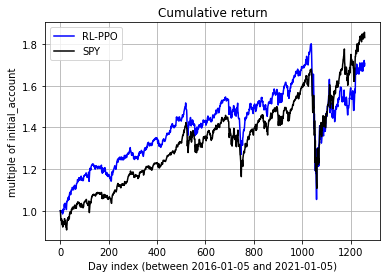

In [12]:
start_eval_date = '2016-01-05'
end_eval_date = '2021-01-05'
# used_tickers = ['PNW', 'BBY', 'BIO', 'RHI', 'CI', 'CSX', 'KO', 'CCZ', 'CMA', 'ETN',
#            'XOM', 'FDX', 'FRT', 'MTB', 'AJG', 'HGM', 'ITW', 'IFF', 'KSU', 'CVS',
#            'NEM', 'XEL', 'OKE', 'PNC', 'PEP', 'MO', 'RGE', 'SO', 'SYK', 'TER',
#            'TSN', 'AEE', 'WST', 'WDC', 'JKHY', 'TFC', 'MS', 'TROW', 'UNN', 'CDNS',
#            'DRE', 'ABMD', 'WRB', 'VLO', 'PBCT', 'PTC', 'XLNX', 'AZO', 'REGN',
#            'AES', 'STE', 'DHI', 'COST', 'EMN', 'ABC', 'WAB', 'HSIC', 'EL', 'RL',
#            'BXP', 'MTD', 'VRSN', 'RSG', 'MCO', 'GRMN', 'MDLZ', 'LVS', 'CE', 'UAA',
#            'FIS', 'CBRE']

tickers = {x: 0 for x in used_tickers}



agent = AgentPPO.AgentPPO() # AgentSAC(), AgentTD3(), AgentDDPG()?
agent.if_use_gae = True
agent.lambda_entropy = 0.1

initial_stocks = np.zeros([len(tickers)]).tolist()
print(initial_stocks)

env_eval = StockEnvMultiple(tickers=tickers,
                            begin_date=start_eval_date,
                            end_date=end_eval_date)


agent.if_on_policy = False
args = Arguments(env_eval, agent)

args.if_remove = False
args.cwd = './AgentPPO_RLStockEnv-v3_(0,)'
args.gamma = gamma
args.break_step = int(2e5)
args.net_dim = 2 ** 9
args.max_step = args.env.max_step
args.max_memo = args.max_step * 4
args.batch_size = 2 ** 10
args.repeat_times = 2 ** 3
args.eval_gap = 2 ** 4
args.eval_times1 = 2 ** 3
args.eval_times2 = 2 ** 5
args.if_allow_break = False
args.target_return = 1.1e7

args.rollout_num = 6 # the number of rollout workers (larger is not always faster)
args.init_before_training()

env_eval.draw_cumulative_return(args, torch, 'PPO')
plt.show()

In [13]:
plt.show()